In [3]:
from keras.preprocessing.image import ImageDataGenerator
import os

main_dir = '..\\dataset'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
val_dir = os.path.join(main_dir, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 18

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')

Found 1929 images belonging to 10 classes.
Found 287 images belonging to 10 classes.
Found 548 images belonging to 10 classes.


In [4]:
for data_batch, label_batch in train_gen:
    print('Data batch shape:', data_batch.shape)
    print('Label batch shape:', label_batch.shape)
    break

Data batch shape: (18, 100, 100, 1)
Label batch shape: (18, 10)


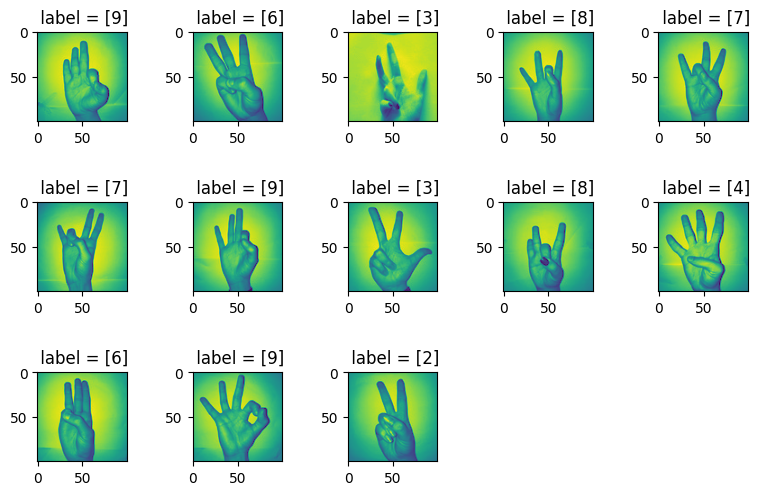

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, 14):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=0.9, wspace=0.01)
    label = np.where(label_batch[i] == 1)
    ax.title.set_text(" label = " + str(label[0]))
    plt.imshow(img)
plt.show()

In [6]:
# Batch parameters

train_filenames = train_gen.filenames
train_count = len(train_filenames)

val_filenames = val_gen.filenames
val_count = len(val_filenames)

test_filenames = test_gen.filenames
test_count = len(test_filenames)

train_spe =  int(train_count / batch_size)
val_spe = int(val_count / batch_size)
test_spe = int(test_count / batch_size)

In [11]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation='relu'))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 33856)             0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [12]:
from keras import optimizers

network.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

history = network.fit(train_gen,
                      steps_per_epoch=train_spe,
                      epochs=5,
                      validation_data=val_gen,
                      validation_steps=val_spe)

Epoch 1/5
107/107 [==============================] - 21s 195ms/step - loss: 1.4623 - accuracy: 0.5646 - val_loss: 0.6594 - val_accuracy: 0.8056
Epoch 2/5
107/107 [==============================] - 21s 194ms/step - loss: 0.3919 - accuracy: 0.8702 - val_loss: 0.4325 - val_accuracy: 0.8574
Epoch 3/5
107/107 [==============================] - 21s 197ms/step - loss: 0.1929 - accuracy: 0.9351 - val_loss: 0.4208 - val_accuracy: 0.8815
Epoch 4/5
107/107 [==============================] - 21s 194ms/step - loss: 0.0981 - accuracy: 0.9676 - val_loss: 0.4784 - val_accuracy: 0.8833
Epoch 5/5
107/107 [==============================] - 21s 194ms/step - loss: 0.0405 - accuracy: 0.9864 - val_loss: 0.4646 - val_accuracy: 0.9130


In [13]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print('Train Accuracy:\n', train_accuracy)
print('\nValidation Accuracy:\n', val_accuracy)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
print('\nTrain Loss:\n', train_loss)
print('\nValidation Loss:\n', val_loss)

epochs = range(1,len(train_accuracy)+1)

Train Accuracy:
 [0.5646258592605591, 0.8702250123023987, 0.9351125359535217, 0.9675562381744385, 0.9863945841789246]

Validation Accuracy:
 [0.8055555820465088, 0.8574073910713196, 0.8814814686775208, 0.8833333253860474, 0.9129629731178284]

Train Loss:
 [1.4623467922210693, 0.3918749690055847, 0.1928602010011673, 0.09809348732233047, 0.04048478603363037]

Validation Loss:
 [0.6593617796897888, 0.4324779510498047, 0.42079049348831177, 0.4784318804740906, 0.4645642340183258]


In [14]:
test_loss, test_accuracy = network.evaluate(test_gen, steps=test_spe)

15/15 [==============================] - 3s 190ms/step - loss: 0.4794 - accuracy: 0.9000


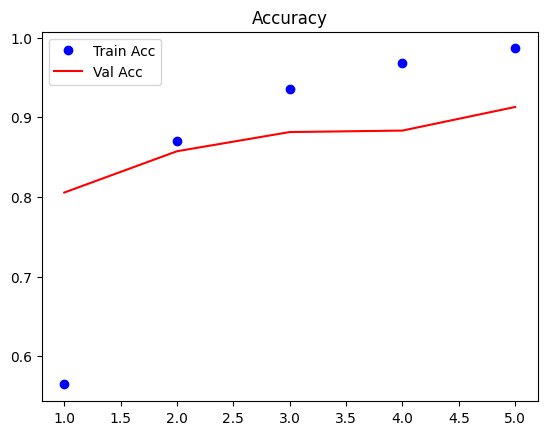

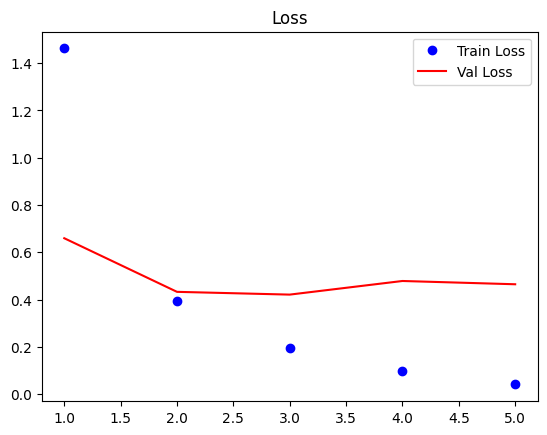

In [15]:
plt.plot(epochs, train_accuracy, 'bo', label='Train Acc')
plt.plot(epochs, val_accuracy, 'r', label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 255ms/step


First layer feature maps:


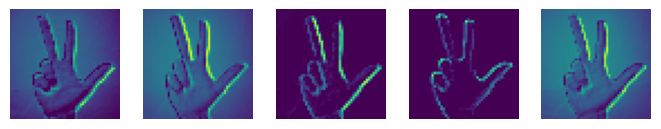

1/1 [==============================] - 0s 58ms/step


Second layer feature maps:


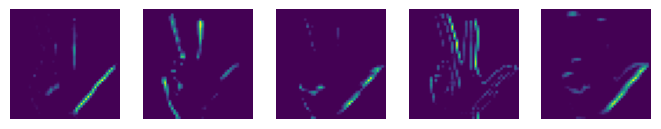

In [16]:
# Visualising the CNN

layer_output = network.layers[1].output

# Create a new model that returns the output of the first convolutional layer
temp_model = models.Model(inputs=network.input, outputs=layer_output)

# Get the feature maps of the first convolutional layer
feature_maps = temp_model.predict(data_batch)

# Plot the feature maps
print("\n\nFirst layer feature maps:")
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(6, 6, i+1)
    plt.imshow(feature_maps[0, :, :, i])
    plt.axis('off')
plt.show()

layer_output = network.layers[2].output

# Create a new model that returns the output of the first convolutional layer
temp_model = models.Model(inputs=network.input, outputs=layer_output)

# Get the feature maps of the first convolutional layer
feature_maps = temp_model.predict(data_batch)

# Plot the feature maps
print("\n\nSecond layer feature maps:")
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(6, 6, i+1)
    plt.imshow(feature_maps[0, :, :, i])
    plt.axis('off')
plt.show()